## Exploratory Data Analysis

In [1]:
#import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import the dataset
shopping_analysis=pd.read_csv("shopping_trends_updated.csv")
df=shopping_analysis
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#information about the shape of the dataset 
print("We have",df.shape[0],"rows and ", df.shape[1], "columns in our dataset.")
print("The titles of the columns are:", [col for col in df.columns])

We have 3900 rows and  18 columns in our dataset.
The titles of the columns are: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']


In [4]:
#information about dataset - df.info():is a way to check for missing values and see the data types in our dataset
print(df.info())
print("We can see that there isn't any missing value, but we're also going to use another function to ensure this fact.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

## Data Preprocessing

In [5]:
#df.isnull().sum() is a function to count the number of missing values in each column
print(df.isnull().any())
print("We can see that we don't have any missing value.")

Customer ID               False
Age                       False
Gender                    False
Item Purchased            False
Category                  False
Purchase Amount (USD)     False
Location                  False
Size                      False
Color                     False
Season                    False
Review Rating             False
Subscription Status       False
Shipping Type             False
Discount Applied          False
Promo Code Used           False
Previous Purchases        False
Payment Method            False
Frequency of Purchases    False
dtype: bool
We can see that we don't have any missing value.


In [6]:
#identifying duplicate record in the dataset
has_duplicates = df.duplicated().any()
if has_duplicates:
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [7]:
#statistical information about the central tendency, dispersion, and shape of the distribution of the numerical columns in our dataset
df.describe().transpose()[1:5]

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


## Data Visualization

Male      2652
Female    1248
Name: Gender, dtype: int64


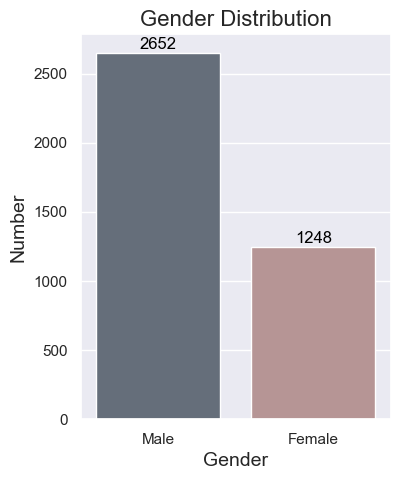

In [35]:
#Gender Distribution -Barplot
gender_counts = df['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(4,5))

ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["#616D7E", "rosybrown"])
for i, v in enumerate(gender_counts):
    ax.text(i, v + 7 , str(v), ha='center', va='bottom', fontsize=12, color='black')
    
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title('Gender Distribution', fontsize=16)
plt.show()

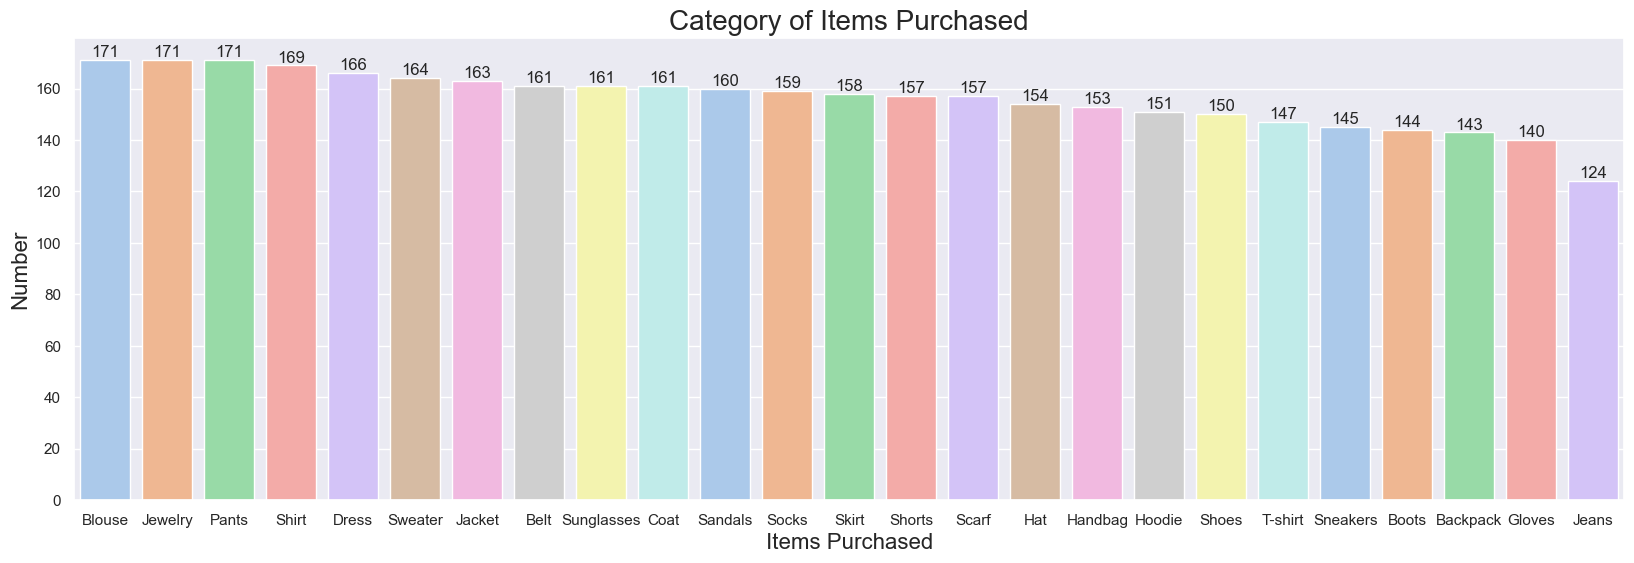

In [34]:
#Categories of Items Purchased -Barplot
items = df['Item Purchased'].value_counts()

plt.figure(figsize=(20, 6))

ax = sns.barplot(x=items.index, y=items.values, palette="pastel")
for i, v in enumerate(items):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.xlabel('Items Purchased', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.title('Category of Items Purchased', fontsize=20)
plt.show()

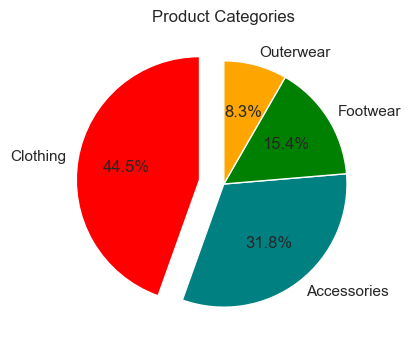

In [48]:
#Categories -Pie chart
Category = df['Category'].value_counts()

category_names = Category.index
category_sizes = Category.values
explode = (0.2, 0, 0, 0) 

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(category_sizes, explode, labels=category_names, autopct='%1.1f%%', startangle=90,
       colors = ['red', 'teal', 'green', 'orange'], )

ax.set_title('Product Categories')
plt.show()

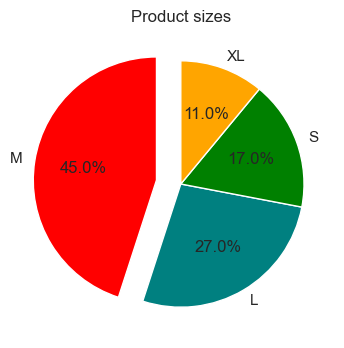

In [47]:
#Size -Pie chart
size = df['Size'].value_counts()
size_names = size.index
size_sizes = size.values
explode = (0.2, 0, 0, 0) 

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(size_sizes, explode, labels= size_names, autopct='%1.1f%%', startangle=90,
      colors = ['red', 'teal', 'green', 'orange'], )

ax.set_title('Product sizes')
plt.show()

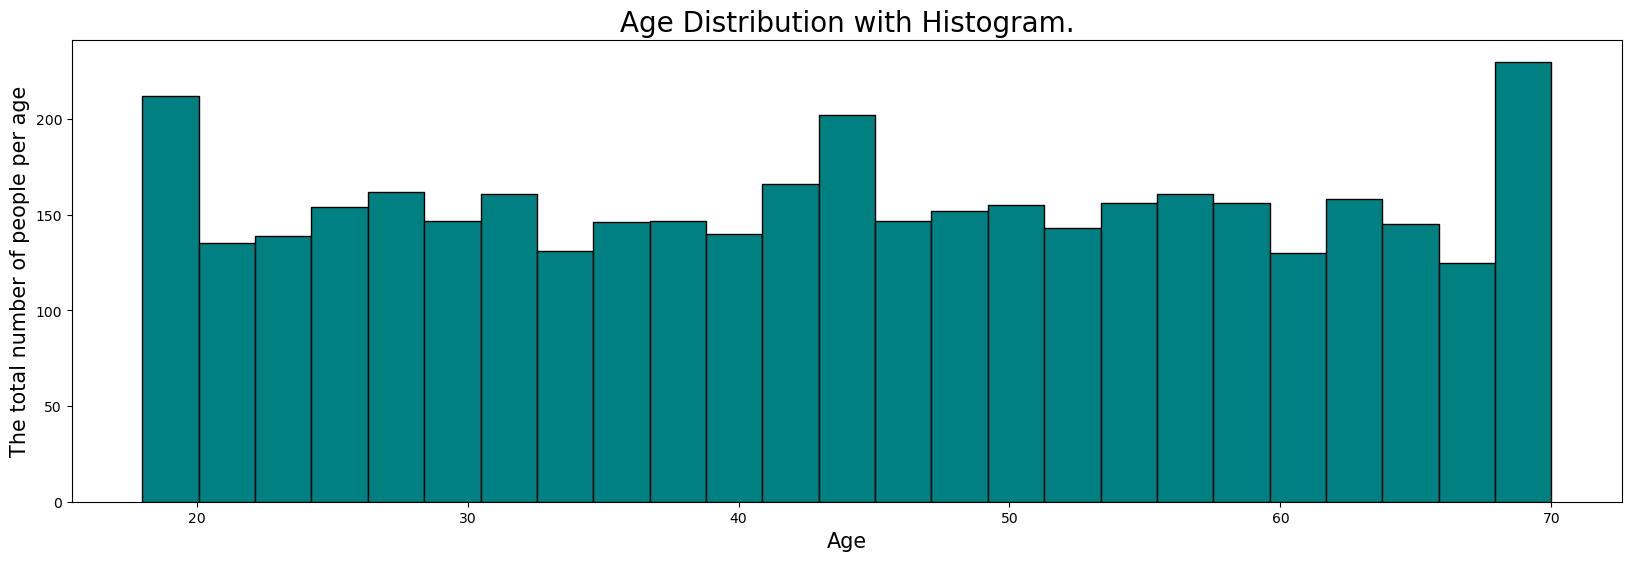

In [12]:
#Age -Histplot
fig, ax = plt.subplots(figsize=(20, 6))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', color = 'teal', density = False)

ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('The total number of people per age', fontsize=15)
ax.set_title('Age Distribution with Histogram.', fontsize= 20)
plt.show()

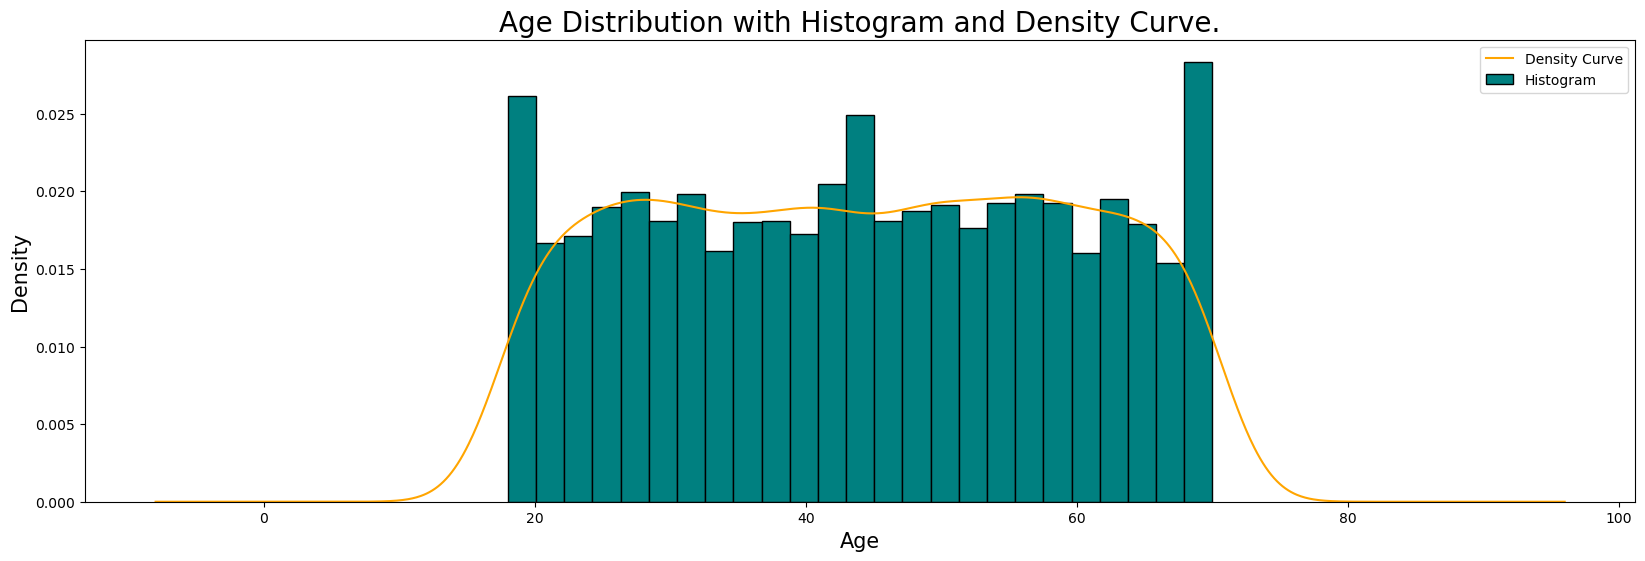

In [13]:
#Age -Histplot
fig, ax = plt.subplots(figsize=(20, 6))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', color = 'teal', density = True)
df['Age'].plot(kind = 'kde', color = 'orange')

ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.set_title('Age Distribution with Histogram and Density Curve.', fontsize= 20)
ax.legend(['Density Curve', 'Histogram'])
plt.show()

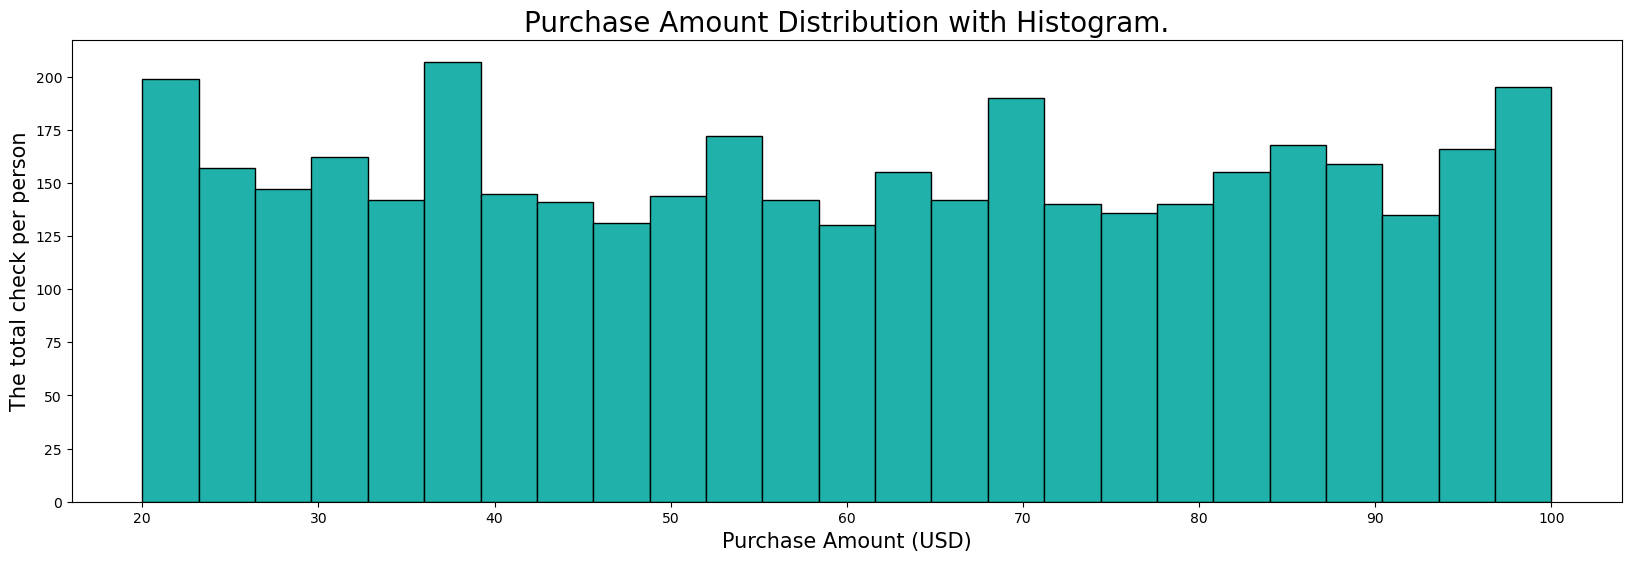

In [14]:
#Purchase Amount (USD) with histogram
fig, ax = plt.subplots(figsize=(20, 6))

ax.hist(df['Purchase Amount (USD)'], bins = 25, edgecolor = 'black', color = 'lightseagreen', density = False)

ax.set_xlabel('Purchase Amount (USD)', fontsize=15)
ax.set_ylabel('The total check per person', fontsize=15)
ax.set_title('Purchase Amount Distribution with Histogram.', fontsize= 20)
plt.show()

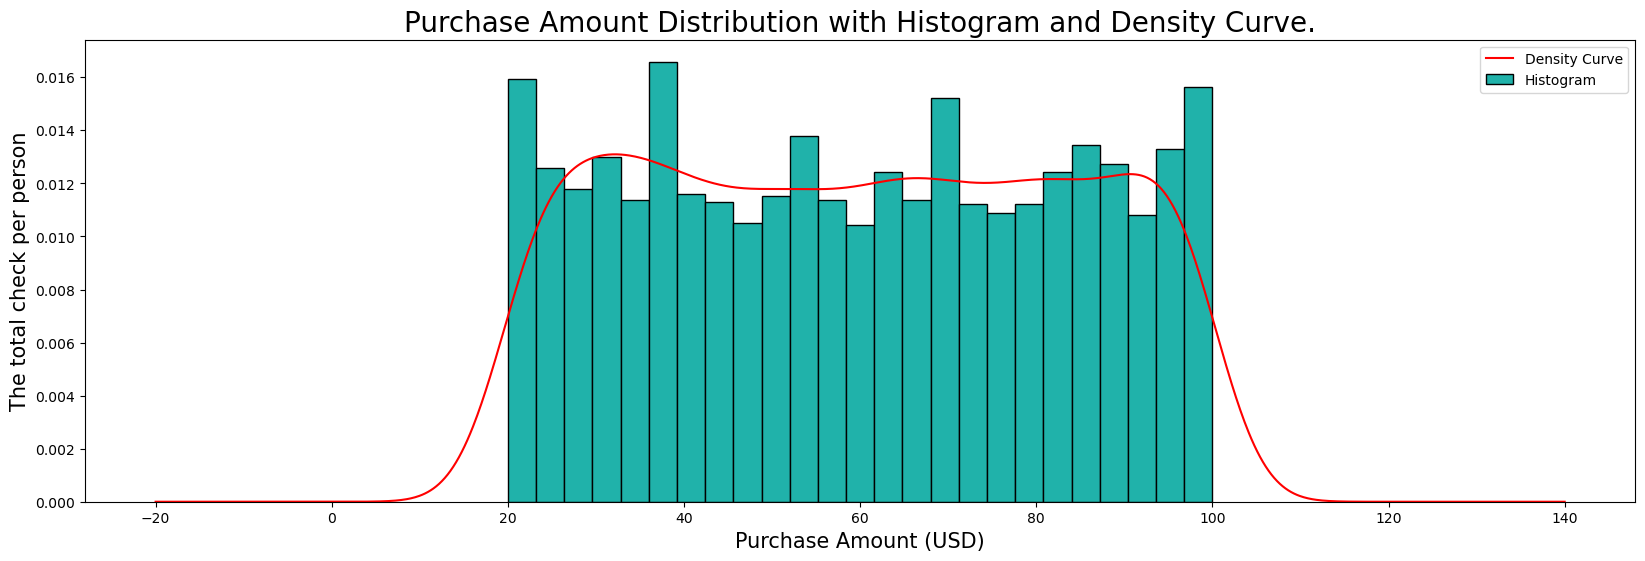

In [15]:
#Purchase Amount (USD) with histogram
fig, ax = plt.subplots(figsize=(20, 6))

ax.hist(df['Purchase Amount (USD)'], bins = 25, edgecolor = 'black', color = 'lightseagreen', density = True)
df['Purchase Amount (USD)'].plot(kind = 'kde', color = 'red')

ax.set_xlabel('Purchase Amount (USD)', fontsize=15)
ax.set_ylabel('The total check per person', fontsize=15)
ax.set_title('Purchase Amount Distribution with Histogram and Density Curve.', fontsize= 20)
ax.legend(['Density Curve', 'Histogram'])
plt.show()

Concisely, the boxplots for size categories exhibit similar distributions, indicating minimal variation in the data
between the four groups. However, the second category performs slightly better for the majority of the data that falls
within it.


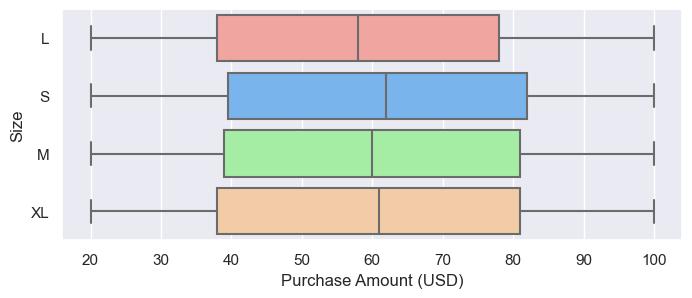

In [101]:
#boxplot with purchase amount and sizes
plt.figure(figsize=(8,3))

sns.boxplot(data=df,x='Purchase Amount (USD)',y='Size', palette = ['#ff9993', '#66b5ff', '#99f999', '#ffcc99'])
sns.set(font_scale=1) 

print("Concisely, the boxplots for size categories exhibit similar distributions, indicating minimal variation in the data")
print("between the four groups. However, the second category performs slightly better for the majority of the data that falls")
print("within it.")

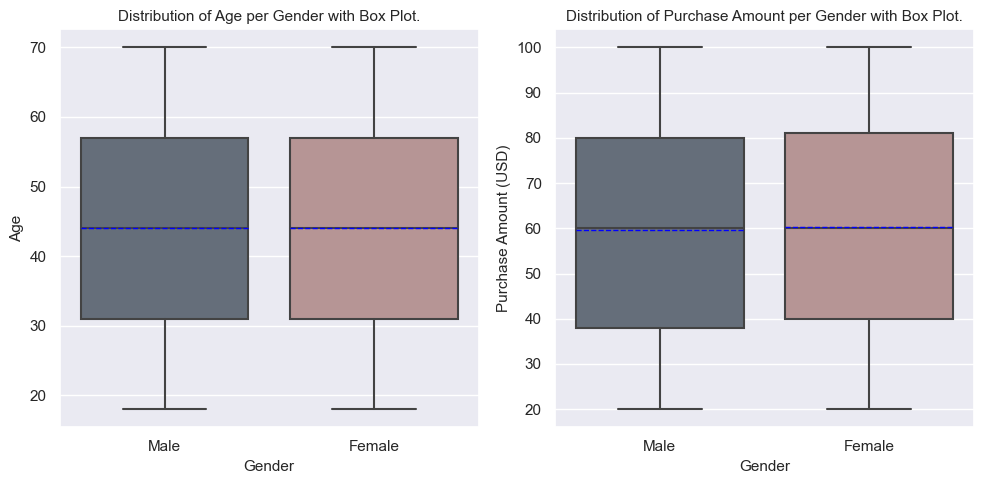

In [49]:
#distribution of age and purchase amount per gender with box plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x= 'Gender', y= 'Age', palette=["#616D7E", "rosybrown"], meanline=True, showmeans=True, 
            meanprops=dict(color='blue'))
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Age', fontsize=11)
plt.title('Distribution of Age per Gender with Box Plot.', fontsize=11)


plt.subplot(1, 2, 2) 
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette=["#616D7E", "rosybrown"], meanline=True, 
            showmeans=True, meanprops=dict(color='blue'))
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Purchase Amount (USD)', fontsize=11)
plt.title('Distribution of Purchase Amount per Gender with Box Plot.', fontsize=11)


plt.tight_layout() 
plt.show()

In [57]:
print("In a nutshell, the box plots for both categories exhibit similar distributions, indicating minimal variation in the")
print("data between the two groups in both box plots above.")
print("In these box plots, we can also see the median price of the Age and Purchase Amount, which provides us with a central")
print("tendency that divides the data into two equal halves, with 50% of the prices falling above it and the other 50% below.")
print("Furthermore, in our dataset the mean price, almost identical to the median, is indicated by the blue dashed line in")
print("our Box Plot. The mean is useful for understanding the average or typical value in the dataset.")

In a nutshell, the box plots for both categories exhibit similar distributions, indicating minimal variation in the
data between the two groups in both box plots above.
In these box plots, we can also see the median price of the Age and Purchase Amount, which provides us with a central
tendency that divides the data into two equal halves, with 50% of the prices falling above it and the other 50% below.
Furthermore, in our dataset the mean price, almost identical to the median, is indicated by the blue dashed line in
our Box Plot. The mean is useful for understanding the average or typical value in the dataset.


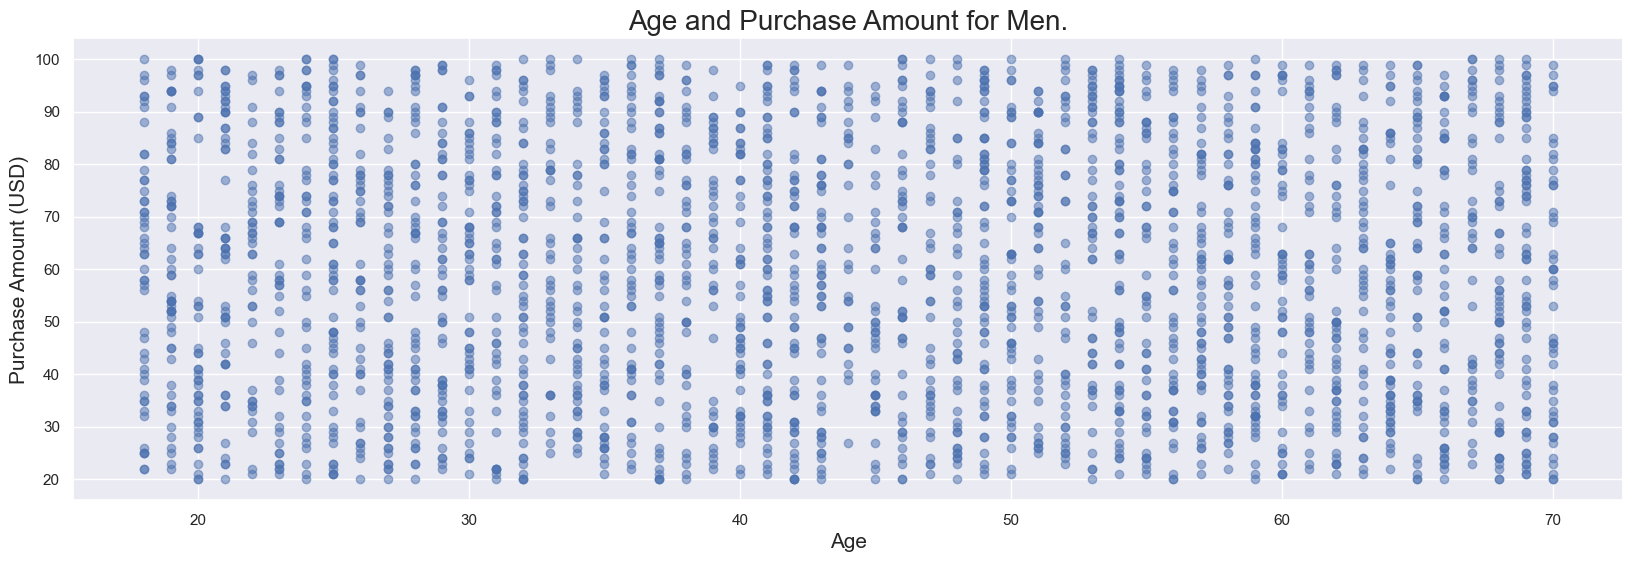

In [61]:
#scatter plot with age and purchase amount for men
gender_m = df['Gender'] == 'Male'
male_data = df[gender_m]

plt.figure(figsize=(20, 6))

plt.scatter(male_data['Age'], male_data["Purchase Amount (USD)"], alpha=0.5)

plt.title('Age and Purchase Amount for Men.', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Purchase Amount (USD)', fontsize=15)
plt.show()

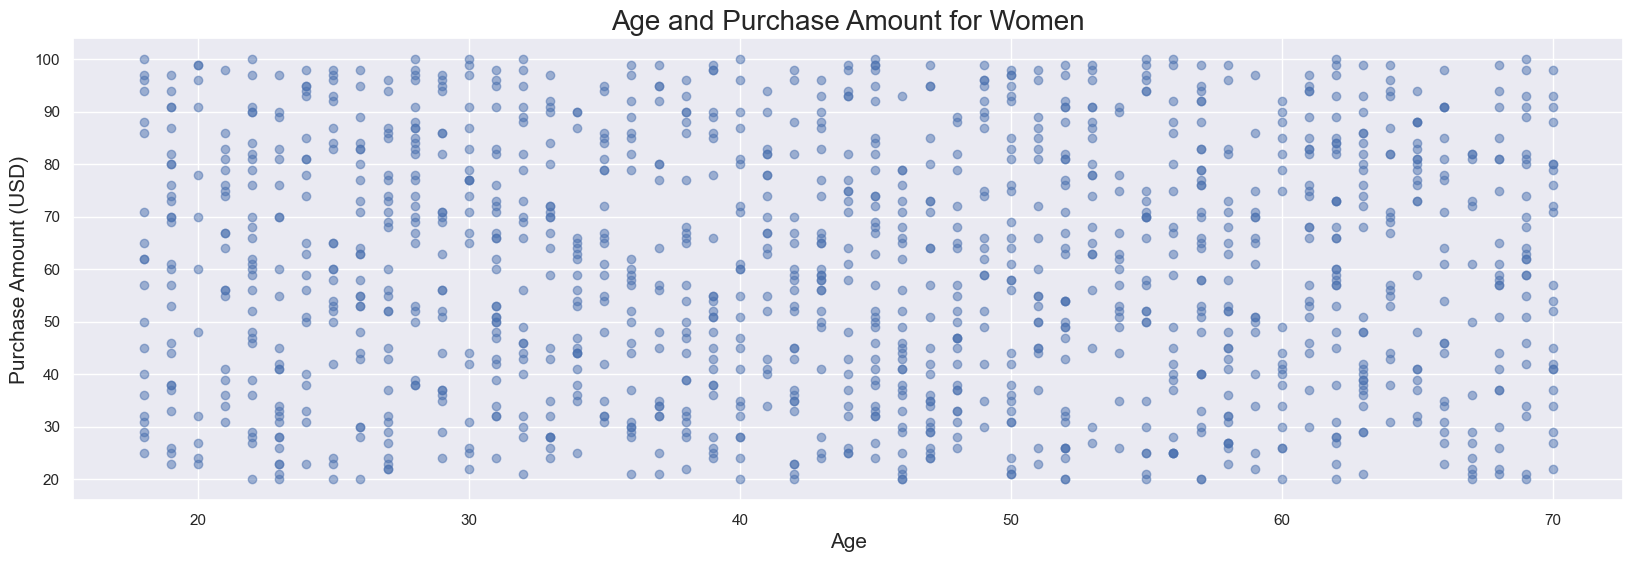

In [60]:
#scatter plot with age and purchase amount for women
gender_f = df['Gender'] == 'Female'
female_data = df[gender_f]

plt.figure(figsize=(20, 6))
plt.scatter(female_data['Age'], female_data["Purchase Amount (USD)"], alpha=0.5)

plt.title('Age and Purchase Amount for Women', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Purchase Amount (USD)', fontsize=15)
plt.show()

<Axes: xlabel='Purchase Amount (USD)', ylabel='Location'>

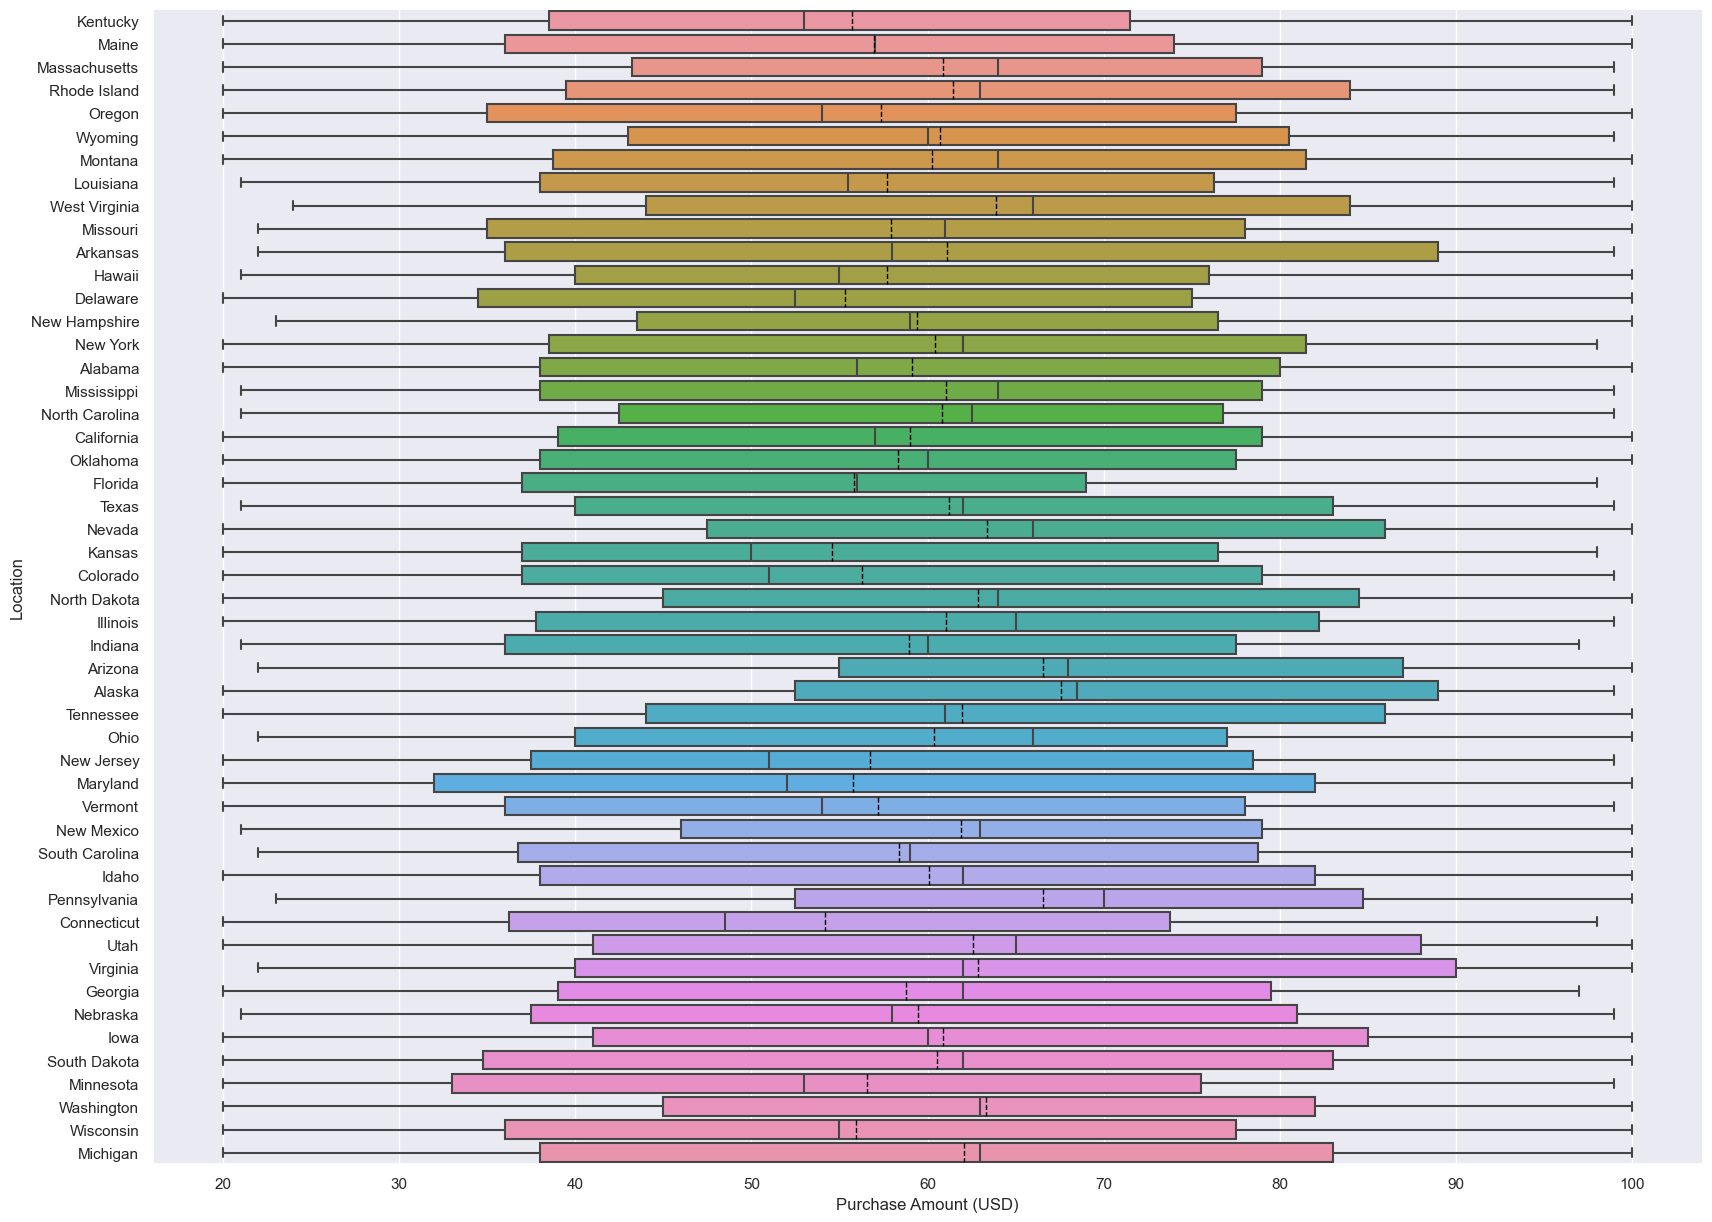

In [66]:
#boxplot with purchase amount per country
plt.figure(figsize=(20, 15))

sns.boxplot(data=df,x='Purchase Amount (USD)',y='Location',meanline=True, showmeans=True, 
            meanprops=dict(color='black'))

In [77]:
#create a table with total money per location 
total_money_per_location = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index();

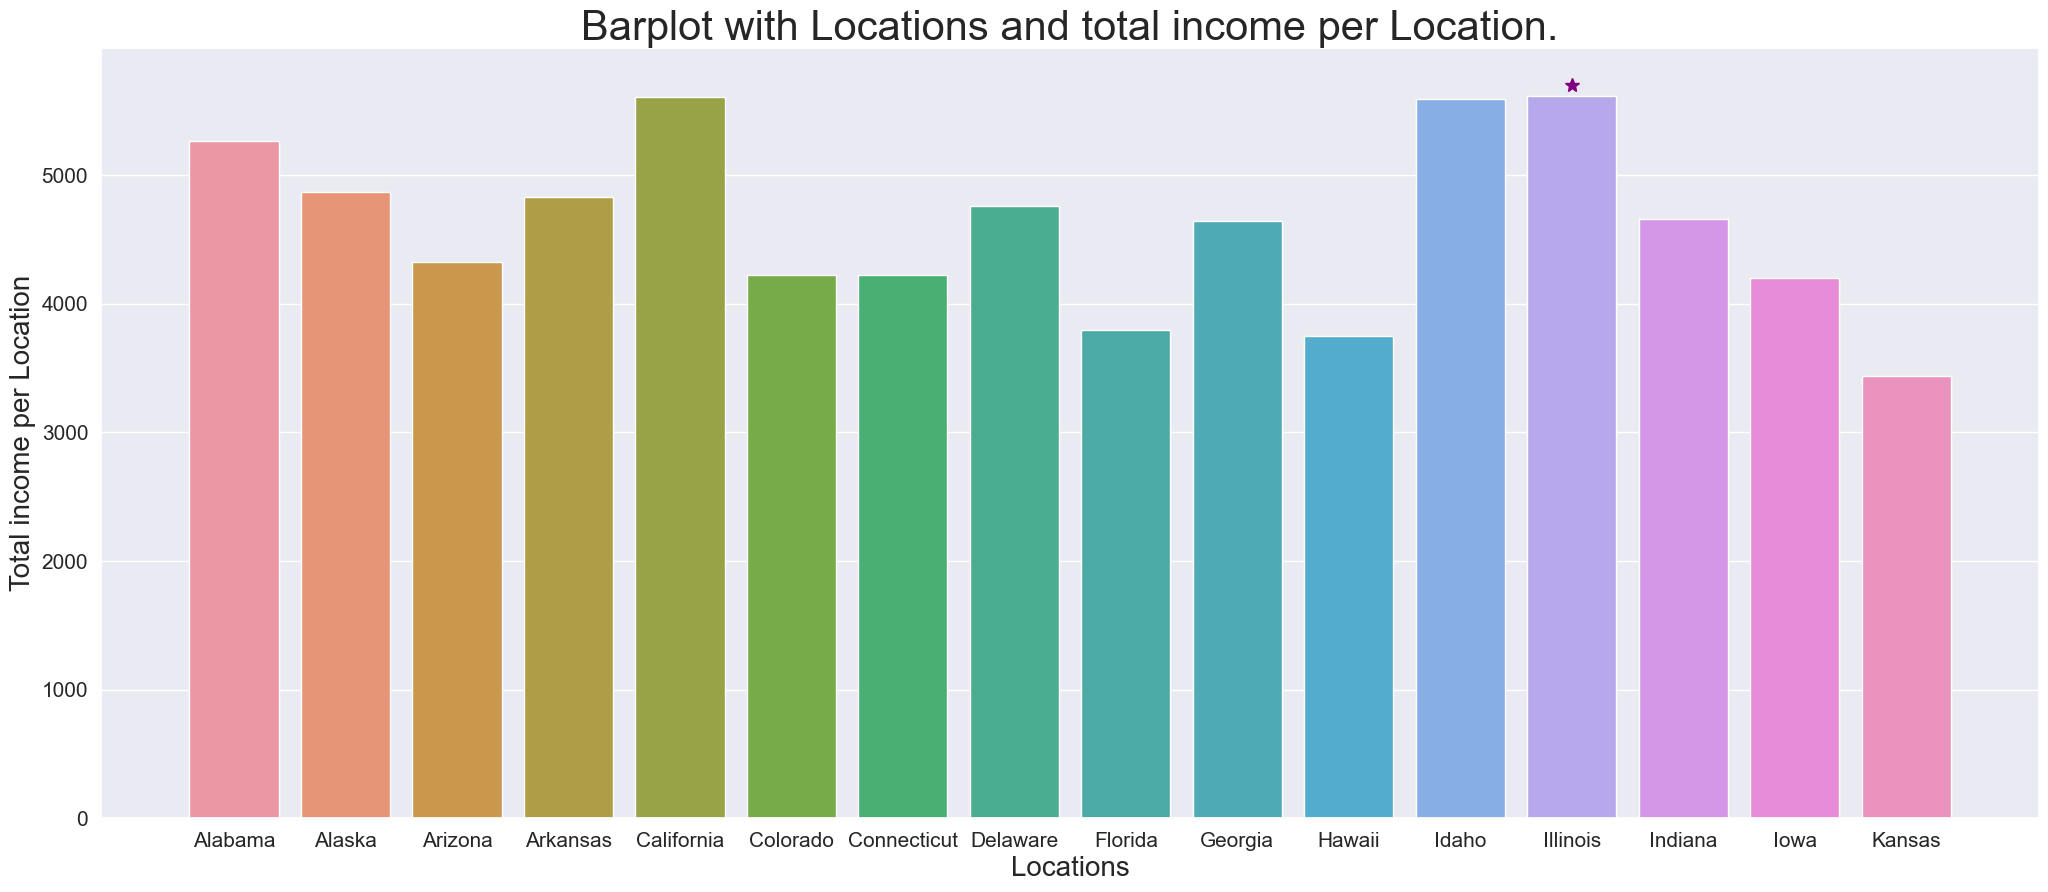

The most total income from these locations comes from Illinois, we can see it clearly, if we just display: location_I.


In [87]:
#create barplot with locations and total income from each of them
location_I = total_money_per_location[0:16]

plt.figure(figsize=(25, 10))
ax = sns.barplot(country_I, x="Location", y="Purchase Amount (USD)")
ax.plot(12, 5700 , "*", markersize=10, color="purple")
ax.tick_params(labelsize=15)

plt.xlabel('Locations', fontsize=20)
plt.ylabel('Total income per Location', fontsize= 20)
plt.title('Barplot with Locations and total income per Location.', fontsize= 30)
plt.show()

print("The most total income from these locations comes from Illinois, we can see it clearly, if we just display: location_I.")

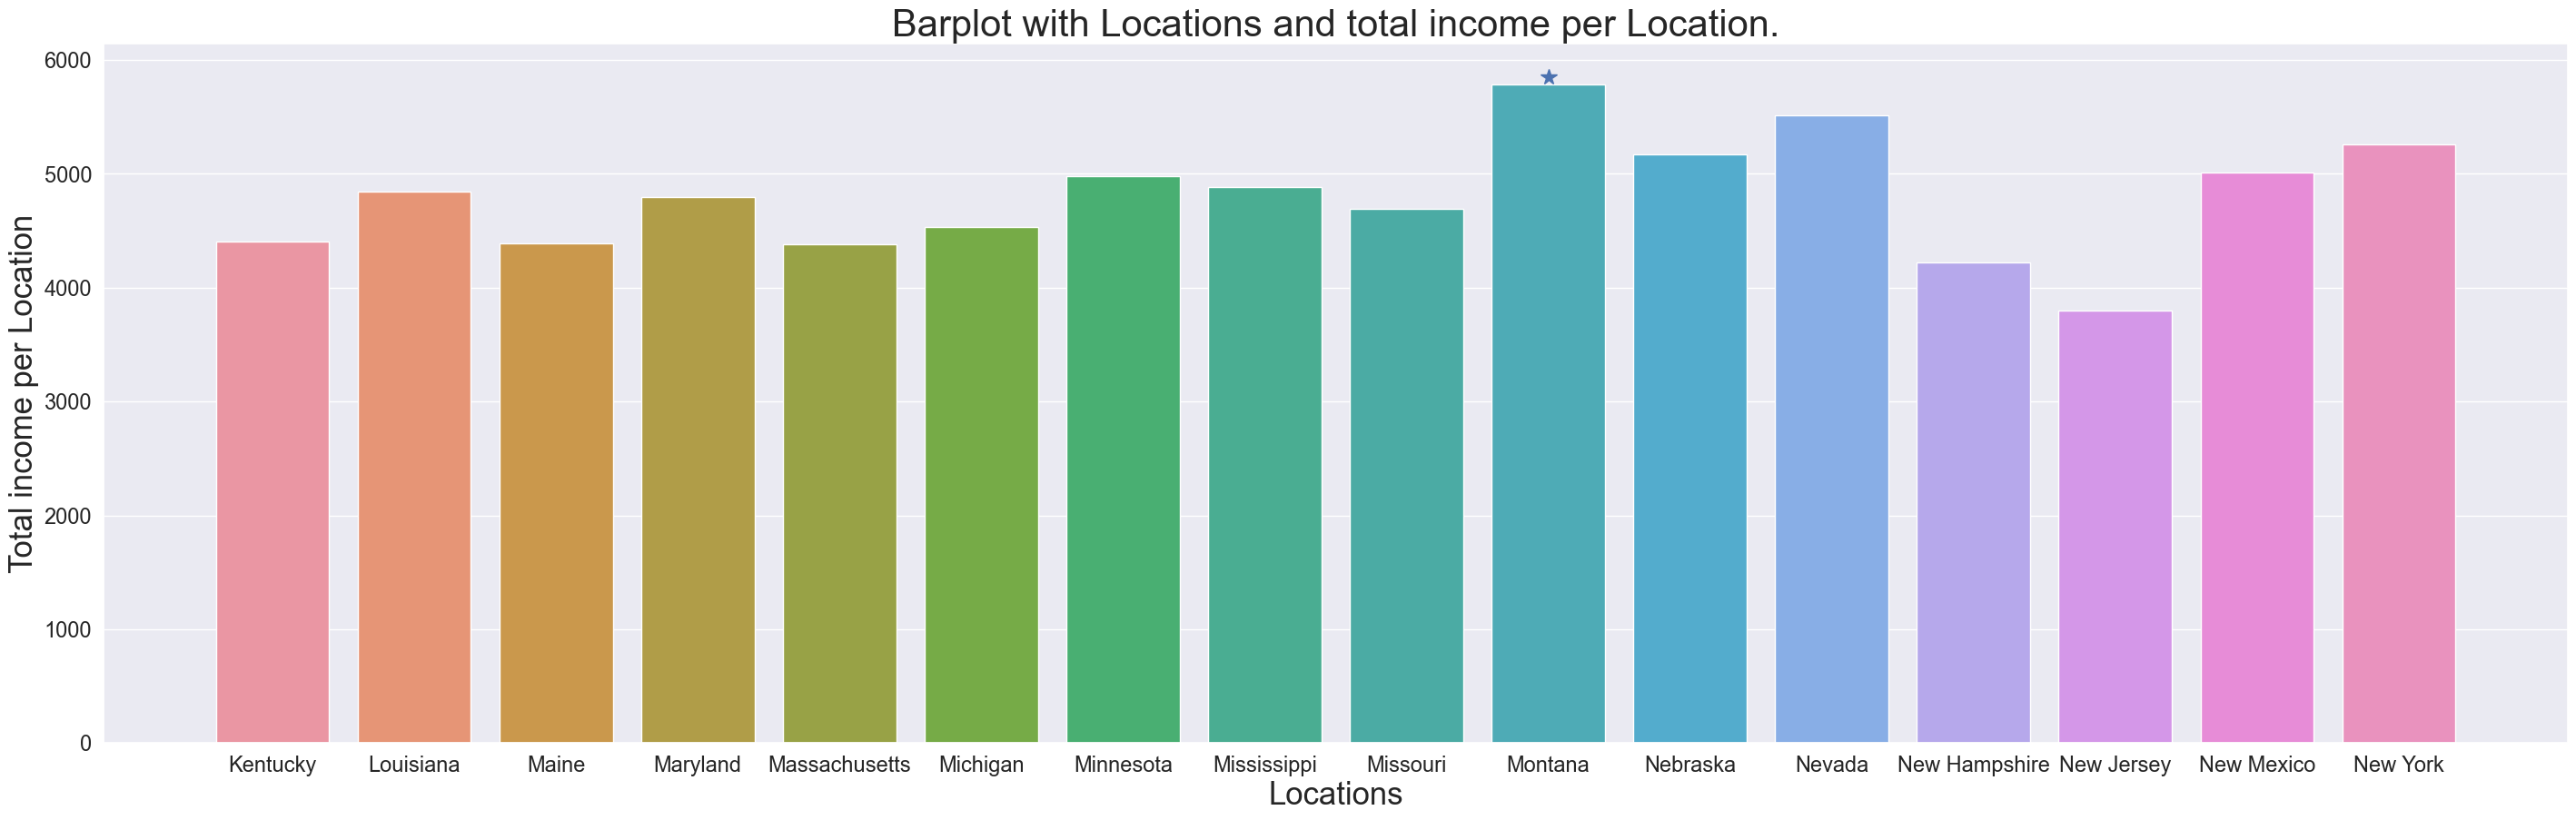

The most total income from these locations comes from Montana, we can see it clearly, if we just display: location_II.


In [88]:
location_II = total_money_per_location[16:32]

plt.figure(figsize=(35, 10))
ax = sns.barplot(country_II, x="Location", y="Purchase Amount (USD)")
ax.plot(9, 5850 , "*", markersize=13, color="b")
ax.tick_params(labelsize= 17)

plt.xlabel('Locations', fontsize=25)
plt.ylabel('Total income per Location', fontsize= 25)
plt.title('Barplot with Locations and total income per Location.', fontsize= 30)
plt.show()

print("The most total income from these locations comes from Montana, we can see it clearly, if we just display: location_II.")

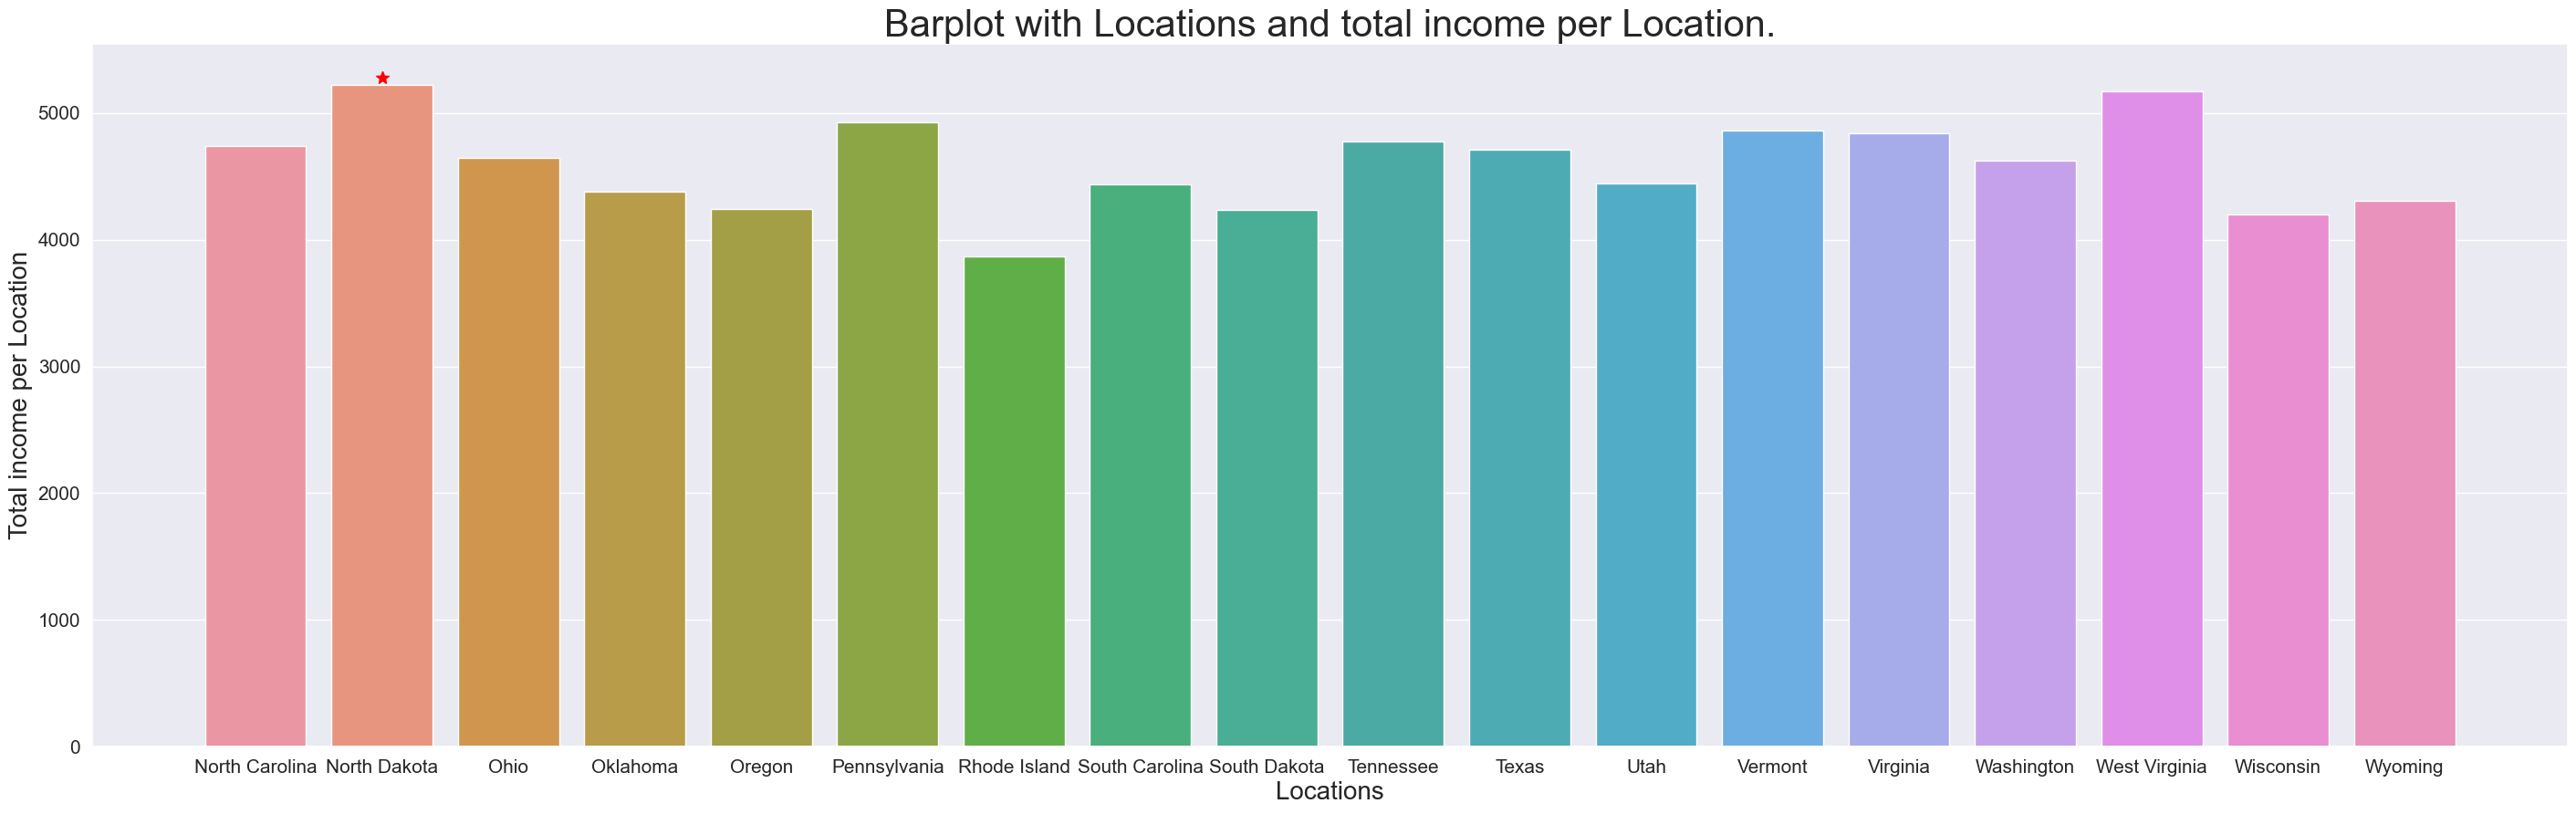

The most total income from these locations comes from North Dakota, we can see it clearly, if we just display: location_III.


In [89]:
location_III = total_money_per_location[32:50]

plt.figure(figsize=(35, 10))
ax = sns.barplot(country_III, x="Location", y="Purchase Amount (USD)")
ax.plot(1, 5280 , "*", markersize=10, color="red")
ax.tick_params(labelsize=15)

plt.xlabel('Locations', fontsize=20)
plt.ylabel('Total income per Location', fontsize= 20)
plt.title('Barplot with Locations and total income per Location.', fontsize= 30)
plt.show()

print("The most total income from these locations comes from North Dakota, we can see it clearly, if we just display: location_III.")

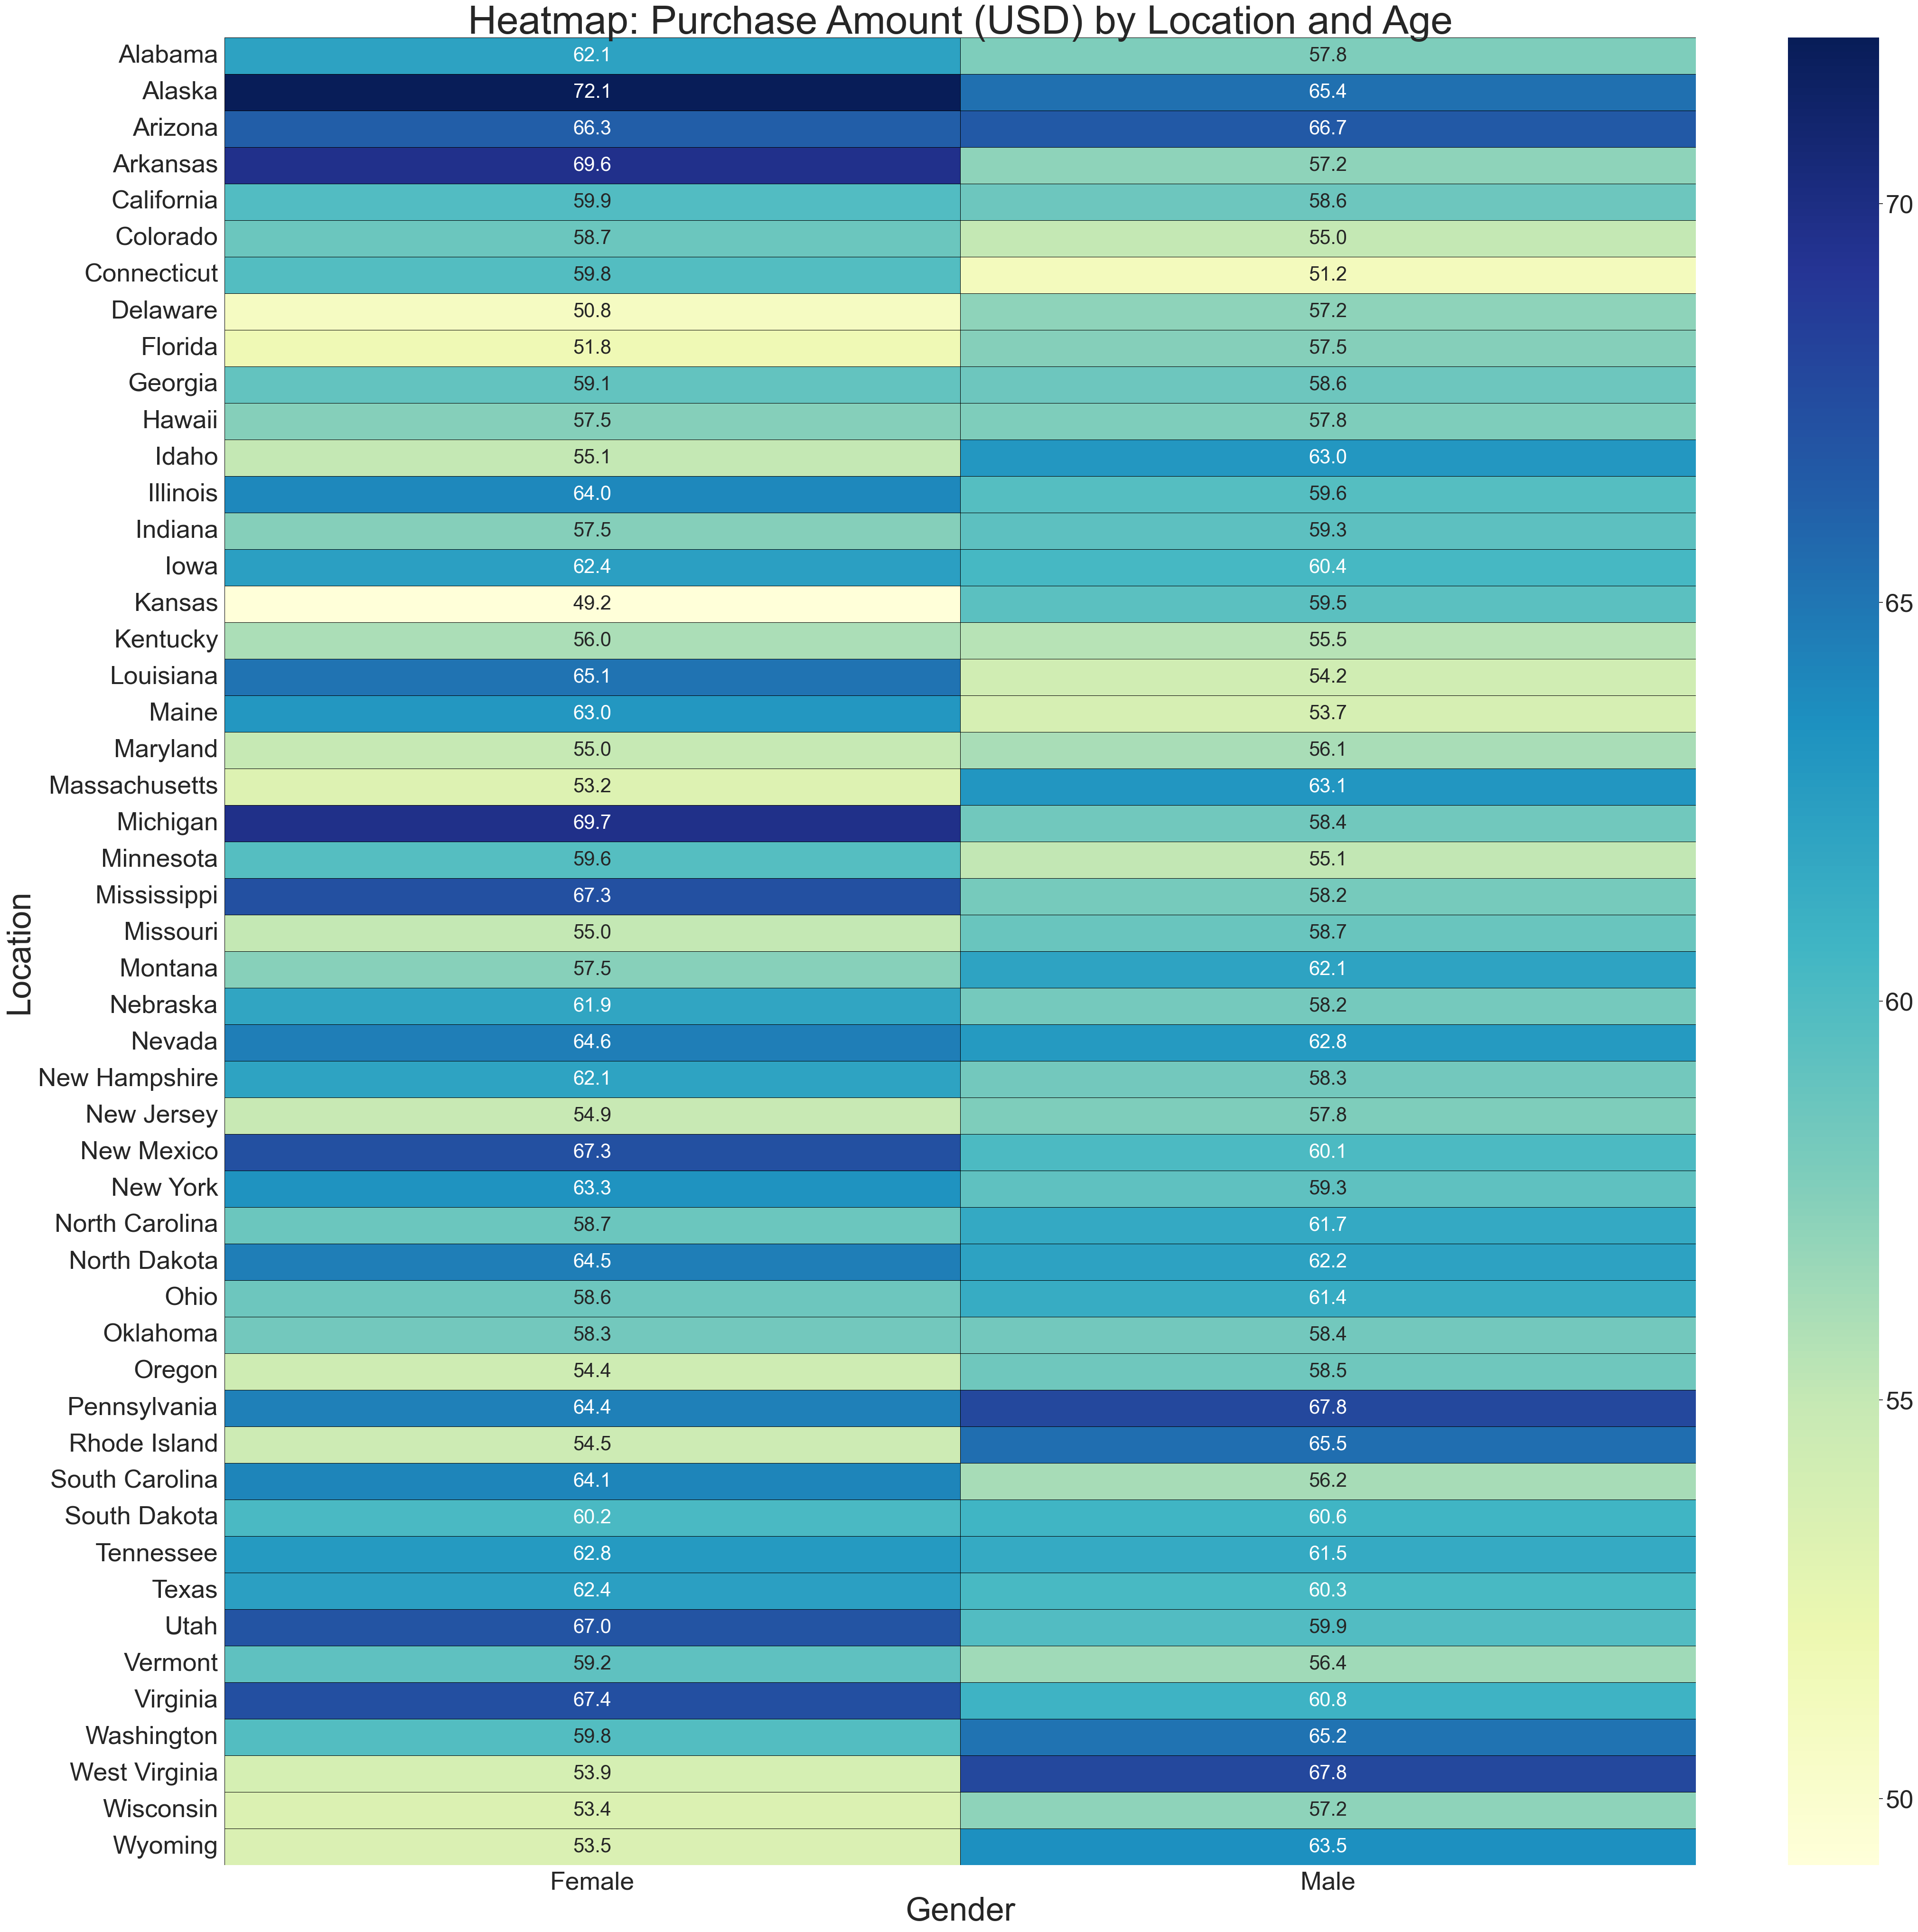

In summary, the heatmap allows us and also makes easier to us to see patterns and variations in purchase amounts
based on both location and gender. The color intensity in the heatmap represents the measure of the means, the lighter
colors indicating lower means and darker colors indicating higher means.


In [98]:
#heatmap for Purchase Amount by Gender and Location
plt.figure(figsize=(50,50))

heatmap_data = df.pivot_table(index='Location', columns='Gender', values='Purchase Amount (USD)')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, linecolor="black", annot_kws={'size': 30})

plt.title('Heatmap: Purchase Amount (USD) by Location and Age', fontsize= 60)
plt.xlabel('Gender', fontsize= 50)
plt.ylabel('Location', fontsize= 50)

plt.show()

print("In summary, the heatmap allows us and also makes easier to us to see patterns and variations in purchase amounts")
print("based on both location and gender. The color intensity in the heatmap represents the measure of the means, the lighter") 
print("colors indicating lower means and darker colors indicating higher means.")

In a nutshell, a pairplot is a valuable tool for data exploration, helping you to quickly assess the relationships
between variables and identify potential areas of interest for further analysis, but in our dataset, the data isn't
in the right form to get any information of it.
But it's nice just to have it, in our data vizulation, because it's a very important seaborn tool.


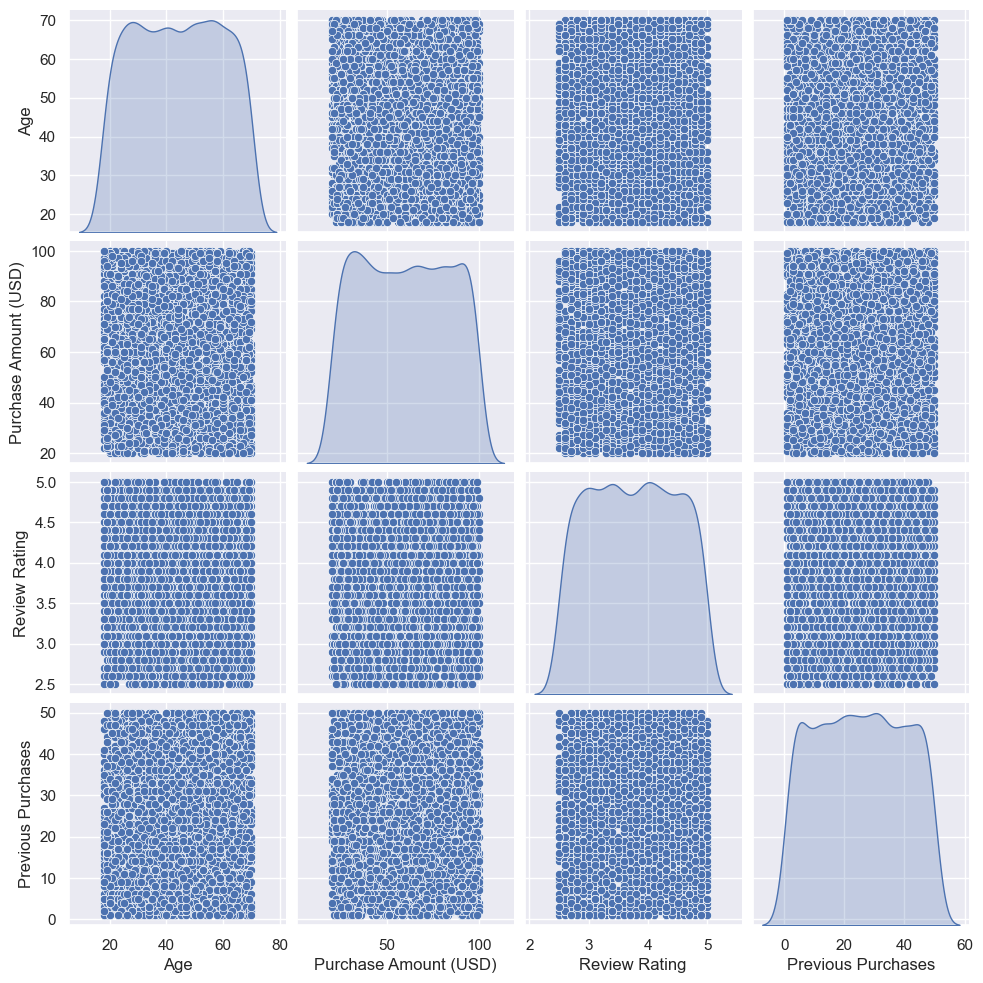

In [105]:
#pairplot with all numerical values in our dataset
newdf = df.drop("Customer ID", axis=1)

sns.pairplot(data=newdf,diag_kind='kde')

print("In a nutshell, a pairplot is a valuable tool for data exploration, helping you to quickly assess the relationships")
print("between variables and identify potential areas of interest for further analysis, but in our dataset, the data isn't")
print("in the right form to get any information of it.")
print("But it's nice just to have it, in our data vizulation, because it's a very important seaborn tool for Data Science.")